# Spotify Popularity Predictor (39%)

The goal of this challenge is to create a model that predicts the popularity of a song based on its features.

The dataset contains a list of tracks with the following characteristics:
- `acousticness`: whether the track is acoustic
- `danceability`: describes how suitable a track is for dancing
- `duration_ms`: duration of the track in milliseconds
- `energy`: represents a perceptual measure of intensity and activity
- `explicit`: whether the track has explicit lyrics
- `id`: id for the track
- `instrumentalness`: predicts whether a track contains no vocals
- `key`: the key the track is in
- `liveness`: detects the presence of an audience in the recording
- `loudness`: the overall loudness of a track in decibels
- `mode`: modality of a track
- `name`: name of the track
- `popularity`: popularity of the track
- `release_date`: release date
- `speechiness`: detects the presence of spoken words in a track
- `tempo`: overall estimated tempo of a track in beats per minute
- `valence`: describes the musical positiveness conveyed by a track
- `artist`: artist who performed the track

# Model

## Data collection

📝 **Load the `spotify_popularity_train.csv` dataset from the provided URL**
- Display the first few rows
- Perform the basic cleaning operations (remove redundant lines, as well as those with missing values)
- Store the result in a `DataFrame` named `data`

In [103]:
url = "https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/spotify_popularity_train.csv"

In [104]:
import numpy as np

In [105]:
import pandas as pd
data = pd.read_csv(url)

In [106]:
data.head() #from the start release date might be a problem : some are year/month/day, some year only..

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,artist
0,0.65400,0.499,219827,0.190,0,0B6BeEUd6UwFlbsHMQKjob,0.004090,7,0.0898,-16.435,1,Back in the Goodle Days,40,1971,0.0454,149.460,0.4300,John Hartford
1,0.00592,0.439,483948,0.808,0,5Gpx4lJy3vKmIvjwbiR5c8,0.140000,2,0.0890,-8.497,1,Worlds Which Break Us - Intro Mix,22,2015-02-02,0.0677,138.040,0.0587,Driftmoon
2,0.73400,0.523,245693,0.288,0,7MxuUYqrCIy93h1EEHrIrL,0.000000,0,0.0771,-11.506,1,I'm The Greatest Star,40,1968-09-01,0.2140,75.869,0.4640,Barbra Streisand
3,0.42900,0.681,130026,0.165,0,4GeYbfIx1vSQXTfQb1m8Th,0.000000,11,0.3940,-21.457,0,Kapitel 281 - Der Page und die Herzogin,1,1926,0.9460,145.333,0.2880,Georgette Heyer
4,0.56200,0.543,129813,0.575,0,2JPGGZwajjMk0vvhfC17RK,0.000004,2,0.1270,-7.374,1,Away from You,15,2008-02-11,0.0265,139.272,0.8010,Gerry & The Pacemakers


In [107]:
data.shape

(52317, 18)

In [108]:
#detecting missing data
data.isnull().sum().sort_values(ascending=False) #NaN count for each column

#only 4 missing artists in entire data set (52000+ lines) ... We will drop them
data=data.dropna()

In [109]:
data.shape

(52313, 18)

In [110]:
#removing duplicates
data = data.drop_duplicates()
data.shape

(52053, 18)

In [111]:
#basic cleaning operations done (remove redundant lines, as well as those with missing values)

🧪 **Run the following cell to save your results**

In [112]:
from nbresult import ChallengeResult

ChallengeResult(
    "data_cleaning",
    shape=data.shape).write()

## Simple model

📝 **Which sklearn's scoring [metric](https://scikit-learn.org/stable/modules/model_evaluation.html) should we use if we want to:**
- **Strongly penalize** largest errors
- Measure errors **in the same unit** than `popularity` 
- Is better when greater (metric_good_model > metric_bad_model)

👉 Store its exact name as `string` in the variable `scoring` below

🚨 You must use this metric for the rest of the challenge

In [113]:
data.popularity.unique()

array([40, 22,  1, 15, 30, 57, 41,  0, 31,  3, 25, 83, 50, 10, 35,  4, 16,
       12, 37, 71, 65, 67, 23, 34, 32, 80, 33, 20,  7, 48, 56, 46,  9, 36,
       28, 47, 64,  8, 51, 11, 29, 14, 55, 26, 53, 24, 13,  2, 62, 19, 58,
       77, 38, 61, 42, 43, 21, 27, 45, 72, 39,  5, 54, 17, 63, 75, 69,  6,
       68, 73, 52, 49, 90, 87, 74, 44, 70, 18, 59, 66, 60, 78, 82, 79, 76,
       85, 89, 81, 84, 92, 88, 86, 91, 94, 96])

In [114]:
scoring = "neg_root_mean_squared_error"

**📝 Let's build a first simple linear model using only the numerical features in our dataset to start with**
- Build `X_simple` keeping only numerical features
- Build `y` your target containing the `popularity`

In [115]:
#getting all numerical values
X_simple=df.select_dtypes([np.int64,np.float64])

#dropping popularity
X_simple=X_simple.drop(['popularity'], axis=1)

acousticness


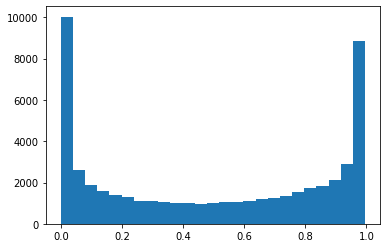

danceability


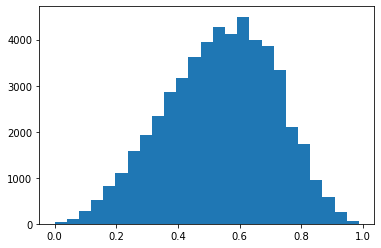

duration_ms


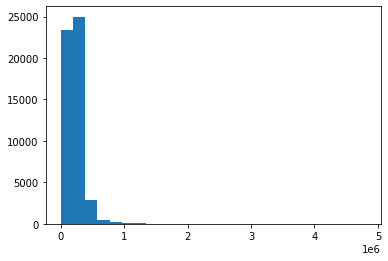

energy


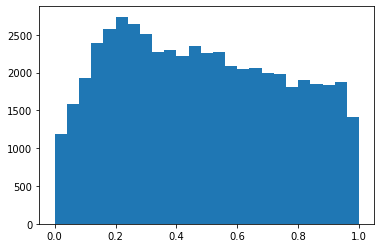

explicit


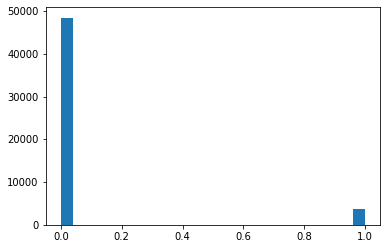

instrumentalness


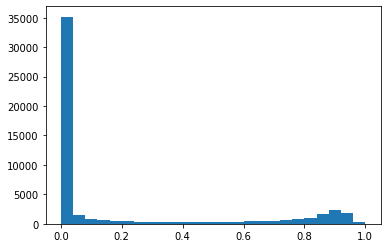

key


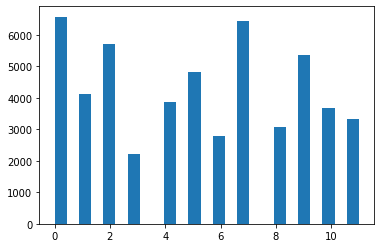

liveness


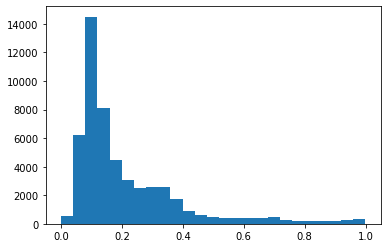

loudness


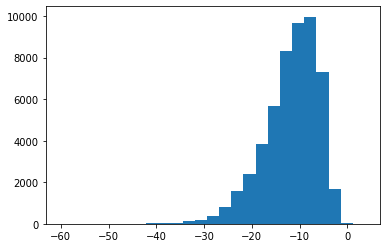

mode


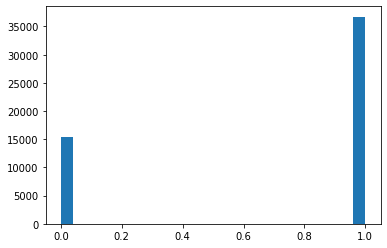

speechiness


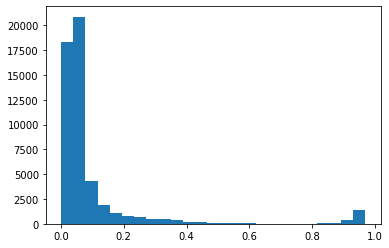

tempo


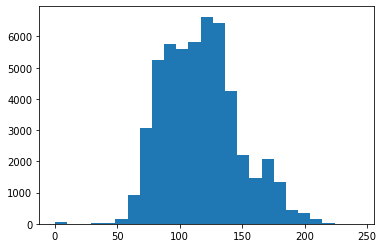

valence


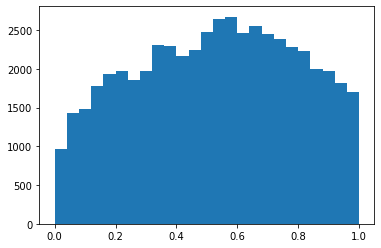

In [116]:
#plotting numerical values to see how to scale them
import matplotlib.pyplot as plt

for col in X_simple.columns.values:
    print(col)
    plt.hist(X_simple[col],bins=25)
    plt.show()

 From plots what needs scaling:
 
 standardizing(standard): loudness,tempo
 robust scaling :duration_ms
 one_hot_encoding: key
 

In [117]:
#scaling X_simple standard

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Instanciate StandarScaler

cols_standard=['loudness','tempo']

for col in cols_standard:
    scaler.fit(X_simple[[col]]) # Fit scaler to data
    X_simple[col] = scaler.transform(X_simple[[col]]) # Use scaler to transform data


In [118]:
#scaling X_simple Robust Scaler

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler() # Instanciate StandarScaler

cols_standard=['duration_ms']

for col in cols_standard:
    scaler.fit(X_simple[[col]]) # Fit scaler to data
    X_simple[col] = scaler.transform(X_simple[[col]]) # Use scaler to transform data


In [119]:
#scaling X_simple OHE

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False) # Instanciate encoder

ohe.fit(X_simple[['key']]) # Fit encoder

key_encoded = ohe.transform(X_simple[['key']]) # key

X_simple["0"],X_simple["1"],X_simple['2'],X_simple['3'],X_simple['4'],\
X_simple['5'],X_simple['6'],X_simple['7'],X_simple['8'],\
X_simple['9'],X_simple['10'],X_simple['11'] = key_encoded.T # Transpose encoded Alley back into dataframe

X_simple.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,...,2,3,4,5,6,7,8,9,10,11
0,0.65400,0.499,0.136339,0.190,0,0.004090,7,0.0898,-0.823320,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.00592,0.439,2.781411,0.808,0,0.140000,2,0.0890,0.570288,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.73400,0.523,0.395377,0.288,0,0.000000,0,0.0771,0.042023,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.42900,0.681,-0.762984,0.165,0,0.000000,11,0.3940,-1.704990,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.56200,0.543,-0.765117,0.575,0,0.000004,2,0.1270,0.767444,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
y=data['popularity']

### Holdout evaluation

**📝 Create the 4 variables `X_train_simple` `y_train`, `X_test_simple`, `y_test` with a 50% split with random sampling**

In [121]:
from sklearn.model_selection import train_test_split


In [122]:
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.5)

**📝 Fit and evaluate a basic linear model (do not fine tune it) with this holdout method**
- Store your model true performance in a float variable `score_simple_holdout`

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
# Instanciate the model
model = LinearRegression()

# Train the model on the Training data
model.fit(X_train_simple, y_train)


y_predict=model.predict(X_test_simple)


In [125]:
score_simple_holdout=-mean_squared_error(y_test, y_predict, squared=False)

In [126]:
score_simple_holdout

-18.351564704867332

### Cross-validation evaluation

📝 **Let's be sure our score is representative**: 
- 5-times cross validate a basic linear model on the whole numeric dataset (`X_simple`, `y`)
- Do not fine tune your model
- Store your mean performance in a variable `score_simple_cv_mean` as a `float`
- Store the standard deviation of your performances in a float variable `score_simple_cv_std`

In [127]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, X_simple, y, cv=5, 
                            scoring=['neg_root_mean_squared_error'])


score_simple_cv_mean=cv_results['test_neg_root_mean_squared_error'].mean()
score_simple_cv_std=cv_results['test_neg_root_mean_squared_error'].std()

In [128]:
score_simple_cv_std

0.09619451502740349

🧪 **Run the following cell to save your results**

In [129]:
from nbresult import ChallengeResult

ChallengeResult(
    "simple_model",
    scoring=scoring,
    shape_train = X_train_simple.shape,
    score_simple_holdout=score_simple_holdout,
    score_simple_cv_mean=score_simple_cv_mean,
    score_simple_cv_std=score_simple_cv_std,
).write()

## Feature engineering

(From now on, we will stop using train/test split but cross-validation on the whole dataset instead)  

Let's try to improve performance using the feature `release_date`

**📝 Create `X_engineered` by adding a new column `year` to `X`, containing the release year of the track as `integer`**

In [131]:
#creating X_engineered
X_engineered=X_simple

#adding year
X_engineered['year']=data['release_date']

#converting it to string, keeping first four char and then back to int to have the year
X_engineered['year']=X_engineered['year'].apply(lambda x: int(str(x)[:4]))

📝 **Let's see how this impact the performance of our model.**
- Retrain the same simple linear model on numerical values only, adding the new feature `year`
- Save the mean cross-validated performance metric in a variable named `score_engineered` as a `float`
- Do not fine tune the model yet

In [143]:
X_train_engineered, X_test_engineered, y_train, y_test = train_test_split(X_engineered, y, test_size=0.5)

In [144]:
# Instanciate the model
model = LinearRegression()

# Train the model on the Training data
model.fit(X_train_engineered, y_train)

LinearRegression()

In [146]:
cv_results = cross_validate(model, X_simple, y, cv=5, 
                            scoring=['neg_root_mean_squared_error'])


score_engineered=cv_results['test_neg_root_mean_squared_error'].mean()

🧪 **Run the following cell to save your results**

In [148]:
from nbresult import ChallengeResult

ChallengeResult("feature_engineering",
    cols = X_engineered.columns,
    years = X_engineered.get("year"),
    score_engineered=score_engineered
).write()

## Pipelining

Let's now look for maximum performance by creating a solid preprocessing pipeline.

**📝 Create a sklearn preprocessing [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and store it as `preproc`**

- Feel free to add any preprocessing steps you think of
- You may want to integrate your feature engineering for `year`
- You may also further improve it using the `ArtistPopularityTransformer` class given to you below
- Don't add any model to it yet

🚨 Advice: It is better for you to have a working pipeline (even simple one) rather than NO pipeline at all

 *REMARKS*  
 
 1-I already did some scaling above so I will use it and put it in a pipeline  
 2- We can drop the ID  
 3- No sure if explicit has a big impact  
 4- will remove oultiers in duration  
 


In [269]:
# 👉 Do not hesitate to reload a clean new dataset if you need a fresh start.

X = data.drop(['popularity','id','name'], axis=1)
X.release_date=X.release_date.apply(lambda x: int(str(x)[:4]))
y = data['popularity']

In [270]:
# We are giving you below a custom transformer that you may want to use in your pipeline (make sure you understanding it)

from sklearn.base import BaseEstimator, TransformerMixin

class ArtistPopularityTransformer(BaseEstimator, TransformerMixin):
    """
    Compute, as a new feature of the test set, the mean popularity of 
    all songs made by the artist on the train set.
    """

    def __init__(self):
        pass

    def fit(self, X, y=None):
        """
        process artist mean popularity from artists songs popularity
        process song global mean popularity
        """

        # process artist popularity
        self.artist_popularity = y.groupby(X.artist).agg("mean")
        self.artist_popularity.name = "artist_popularity"

        # process mean popularity
        self.mean_popularity = y.mean()

        return self

    def transform(self, X, y=None):
        """
        apply artist mean popularity vs song global mean popularity to songs
        """

        # inject artist popularity
        X_copy = X.merge(self.artist_popularity, how="left", left_on="artist", right_index=True)

        # fills popularity of unknown artists with song global mean popularity
        X_copy.replace(np.nan, self.mean_popularity, inplace=True)

        return X_copy[["artist_popularity"]]

In [271]:

artist_transfo = ArtistPopularityTransformer()


In [272]:
# I know we need a feature union but I ma wasting too much time trying to make it so I add
#this column manually and drop artists
result=artist_transfo.fit_transform(X,y)


In [273]:
X['artist_popularity']=result

In [274]:
X = X.drop(['artist'], axis=1)

In [275]:
X

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,artist_popularity
0,0.65400,0.499,219827,0.190,0,0.004090,7,0.0898,-16.435,1,1971,0.0454,149.460,0.4300,35.000000
1,0.00592,0.439,483948,0.808,0,0.140000,2,0.0890,-8.497,1,2015,0.0677,138.040,0.0587,10.000000
2,0.73400,0.523,245693,0.288,0,0.000000,0,0.0771,-11.506,1,1968,0.2140,75.869,0.4640,34.333333
3,0.42900,0.681,130026,0.165,0,0.000000,11,0.3940,-21.457,0,1926,0.9460,145.333,0.2880,3.770732
4,0.56200,0.543,129813,0.575,0,0.000004,2,0.1270,-7.374,1,2008,0.0265,139.272,0.8010,13.296296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52312,0.16400,0.512,56253,0.907,0,0.004870,6,0.8010,-7.804,1,1977,0.6620,85.615,0.3150,25.000000
52313,0.77300,0.533,192838,0.659,0,0.773000,2,0.1130,-9.117,0,1965,0.0426,158.366,0.6140,28.750000
52314,0.45600,0.548,310840,0.568,0,0.000000,6,0.0892,-5.348,1,2020,0.0275,77.495,0.3380,0.000000
52315,0.96500,0.360,216493,0.132,0,0.000000,10,0.1260,-21.014,1,1952,0.0355,80.909,0.4100,0.578947


In [276]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# Standard Scale: 
standard_transformer  = Pipeline([
    ('Standard_Scaler', StandardScaler())
])

# Robust Scale: 
robust_transformer  = Pipeline([
    ('Robust_Scaler', RobustScaler())
])

# Encode categorical variables
cat_transformer = OneHotEncoder(handle_unknown='ignore',sparse=False)

#year transfromation pipe , i tried, it did not work so i am doing it manualy at the beginning
#year_transfo = FunctionTransformer(lambda x: int(str(x)[:4]))
#year_pipe= Pipeline([
#     ('year_transfo', year_transfo),
#     ('Standard_Scaler', StandardScaler())
# ])

# Paralellize "num_transformer" and "One hot encoder"
preproc = ColumnTransformer([
    ('standard_transformer', standard_transformer, ['loudness','tempo']),
    ('robust_transformer', robust_transformer, ['duration_ms','release_date','artist_popularity']),
    ('cat_transformer', cat_transformer, ['key']),],
    remainder='passthrough')


In [277]:
preproc.fit(X)
pd.DataFrame(preproc.transform(X))

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.823320,1.069938,0.136339,-0.136364,0.191824,0.0,0.0,0.0,0.0,0.0,...,0.0,0.65400,0.499,0.190,0.0,0.004090,0.0898,1.0,0.0454,0.4300
1,0.570288,0.692617,2.781411,0.863636,-0.516252,0.0,0.0,1.0,0.0,0.0,...,0.0,0.00592,0.439,0.808,0.0,0.140000,0.0890,1.0,0.0677,0.0587
2,0.042023,-1.361536,0.395377,-0.204545,0.172942,1.0,0.0,0.0,0.0,0.0,...,0.0,0.73400,0.523,0.288,0.0,0.000000,0.0771,1.0,0.2140,0.4640
3,-1.704990,0.933581,-0.762984,-1.159091,-0.692684,0.0,0.0,0.0,0.0,0.0,...,1.0,0.42900,0.681,0.165,0.0,0.000000,0.3940,0.0,0.9460,0.2880
4,0.767444,0.733323,-0.765117,0.704545,-0.422891,0.0,0.0,1.0,0.0,0.0,...,0.0,0.56200,0.543,0.575,0.0,0.000004,0.1270,1.0,0.0265,0.8010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52048,0.691952,-1.039525,-1.501793,0.000000,-0.091406,0.0,0.0,0.0,0.0,0.0,...,0.0,0.16400,0.512,0.907,0.0,0.004870,0.8010,1.0,0.6620,0.3150
52049,0.461440,1.364196,-0.133946,-0.272727,0.014805,0.0,0.0,1.0,0.0,0.0,...,0.0,0.77300,0.533,0.659,0.0,0.773000,0.1130,0.0,0.0426,0.6140
52050,1.123132,-1.307813,1.047800,0.977273,-0.799482,0.0,0.0,0.0,0.0,0.0,...,0.0,0.45600,0.548,0.568,0.0,0.000000,0.0892,1.0,0.0275,0.3380
52051,-1.627217,-1.195013,0.102950,-0.568182,-0.783085,0.0,0.0,0.0,0.0,0.0,...,0.0,0.96500,0.360,0.132,0.0,0.000000,0.1260,1.0,0.0355,0.4100


In [278]:
from sklearn.pipeline import FeatureUnion

In [279]:
# Create a new column for artist popularity

#skipping it

# artist_transformation=artist_transfo.fit_transform(X,y)
# robust_transformer  = Pipeline([
#     ('Robust_Scaler', artist_transformation,
#     ('Robust_Scaler', RobustScaler())
# ])

# union = FeatureUnion([
#     ('preprocess', preprocessor), # columns 0-8
#     ('bmi_age_ratio', bmi_age_ratio_constructor) # new colums 9
# ])

**📝 Store the number of columns/feature after preprocessing your inputs in a variable `col_number`**

In [286]:
X.shape

(52053, 15)

🧪 **Run the following cells to save your results**

In [288]:
# Visually print your preproc
from sklearn import set_config; set_config(display='diagram')
preproc

ColumnTransformer(remainder='passthrough',
                  transformers=[('standard_transformer',
                                 Pipeline(steps=[('Standard_Scaler',
                                                  StandardScaler())]),
                                 ['loudness', 'tempo']),
                                ('robust_transformer',
                                 Pipeline(steps=[('Robust_Scaler',
                                                  RobustScaler())]),
                                 ['duration_ms', 'release_date',
                                  'artist_popularity']),
                                ('cat_transformer',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['key'])])

In [289]:
# Save your preproc
from nbresult import ChallengeResult

ChallengeResult(
    "preprocessing",
    col_number=col_number,
    first_observation = preproc.fit_transform(X, y)[0]
).write()

## Training

📝 **Time to fine tune your models**

- Add an **estimator** to your pipeline (only from Scikit-learn) 

- Train your pipeline and **fine-tune** (optimize) your estimator to maximize prediction score

- You must try to fine tune at least 2 different models: 
    - create one pipeline with a **linear model** of your choice
    - create one pipeline with an **ensemble model** of your choice

Then, 

- Save your two best 5-time cross-validated scores as _float_: `score_linear` and `score_ensemble`

- Save your two best trained pipelines as _Pipeline_ objects: `pipe_linear` and `pipe_ensemble`

### Linear

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [323]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [352]:
# Combine preprocessor and linear model in pipeline
pipe_linear = Pipeline([
    ('preprocessing', preproc),
    ('linear_regression', Ridge())])
pipe_linear

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard_transformer',
                                                  Pipeline(steps=[('Standard_Scaler',
                                                                   StandardScaler())]),
                                                  ['loudness', 'tempo']),
                                                 ('robust_transformer',
                                                  Pipeline(steps=[('Robust_Scaler',
                                                                   RobustScaler())]),
                                                  ['duration_ms',
                                                   'release_date',
                                                   'artist_popularity']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['key'])])),
                ('linear_regression', Ridge())])

In [353]:
#### Get all pipe components parameters (to find hyper params names)
pipe_linear.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('standard_transformer',
                                    Pipeline(steps=[('Standard_Scaler',
                                                     StandardScaler())]),
                                    ['loudness', 'tempo']),
                                   ('robust_transformer',
                                    Pipeline(steps=[('Robust_Scaler',
                                                     RobustScaler())]),
                                    ['duration_ms', 'release_date',
                                     'artist_popularity']),
                                   ('cat_transformer',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    ['key'])])),
  ('linear_regression', Ridge())],
 'verbose': False,
 'preprocessing'

In [333]:
from sklearn.model_selection import GridSearchCV

# Instanciate grid search
grid_search = GridSearchCV(
    pipe_linear, 
    param_grid={
        # Access any component of the pipeline, as far back as you want
        'linear_regression__alpha': [0.1, 0.5, 1,2,3,4, 5,6,7,8,9, 10],
        'linear_regression__fit_intercept':[True,False],
        'linear_regression__normalize':[True,False]},
    
    cv=5,
    scoring="neg_root_mean_squared_error")

grid_search.fit(X_train, y_train)
grid_search.best_params_
grid_search.best_score_

-8.901311644438914

In [334]:
grid_search.best_params_

{'linear_regression__alpha': 5,
 'linear_regression__fit_intercept': True,
 'linear_regression__normalize': False}

In [335]:
score_linear=grid_search.best_score_

### Ensemble

In [338]:
from sklearn.ensemble import RandomForestRegressor

In [343]:
# Combine preprocessor and linear model in pipeline
pipe_ensemble = Pipeline([
    ('preprocessing', preproc),
    ('ensemble_regression', RandomForestRegressor())])
pipe_ensemble

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard_transformer',
                                                  Pipeline(steps=[('Standard_Scaler',
                                                                   StandardScaler())]),
                                                  ['loudness', 'tempo']),
                                                 ('robust_transformer',
                                                  Pipeline(steps=[('Robust_Scaler',
                                                                   RobustScaler())]),
                                                  ['duration_ms',
                                                   'release_date',
                                                   'artist_popularity']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['key'])])),
                ('ensemble_regression', RandomForestRegressor())])

In [344]:
#### Get all pipe components parameters (to find hyper params names)
pipe_ensemble.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('standard_transformer',
                                    Pipeline(steps=[('Standard_Scaler',
                                                     StandardScaler())]),
                                    ['loudness', 'tempo']),
                                   ('robust_transformer',
                                    Pipeline(steps=[('Robust_Scaler',
                                                     RobustScaler())]),
                                    ['duration_ms', 'release_date',
                                     'artist_popularity']),
                                   ('cat_transformer',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    ['key'])])),
  ('ensemble_regression', RandomForestRegressor())],
 'verbose': False

In [348]:
from sklearn.model_selection import GridSearchCV

# Instanciate grid search
grid_search = GridSearchCV(
    pipe_ensemble, 
    param_grid={
        # Access any component of the pipeline, as far back as you want
        'ensemble_regression__n_estimators': [10,30,100],
        'ensemble_regression__min_samples_split':[2]},
    
    cv=5,
    scoring="neg_root_mean_squared_error")

grid_search.fit(X_train, y_train)
grid_search.best_params_
grid_search.best_score_

-8.109271826971469

In [350]:
score_ensemble=grid_search.best_score_

🧪 **Run the following cells to save your results**

In [354]:
# Print below your best pipe for correction purpose
from sklearn import set_config; set_config(display='diagram')
pipe_linear

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard_transformer',
                                                  Pipeline(steps=[('Standard_Scaler',
                                                                   StandardScaler())]),
                                                  ['loudness', 'tempo']),
                                                 ('robust_transformer',
                                                  Pipeline(steps=[('Robust_Scaler',
                                                                   RobustScaler())]),
                                                  ['duration_ms',
                                                   'release_date',
                                                   'artist_popularity']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['key'])])),
                ('linear_regression', Ridge())])

In [355]:
# Print below your best pipe for correction purpose
pipe_ensemble

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard_transformer',
                                                  Pipeline(steps=[('Standard_Scaler',
                                                                   StandardScaler())]),
                                                  ['loudness', 'tempo']),
                                                 ('robust_transformer',
                                                  Pipeline(steps=[('Robust_Scaler',
                                                                   RobustScaler())]),
                                                  ['duration_ms',
                                                   'release_date',
                                                   'artist_popularity']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['key'])])),
                ('ensemble_regression', RandomForestRegressor())])

In [356]:
from nbresult import ChallengeResult

ChallengeResult("model_tuning",
    scoring = scoring,
    score_linear=score_linear,
    score_ensemble=score_ensemble).write()

## API 

Time to put a pipeline in production!

👉 Go to https://github.com/lewagon/data-certification-api and follow instructions

**This final part is independent from the above notebook**